<a href="https://colab.research.google.com/github/Longownica/io-projekt/blob/do-wyslania/Projekt_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predykcja jakości wina rodzaju Vinho Verde (port.)

Zbiór danych zawiera informacje o zawartości różnych związków chemicznych zawartych w winie i ich wpływie na jego ogólną jakość.

Zgodnie z opisem na [stronie](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset) kolumny oznaczają następujące:

*   1 - fixed acidity - kwasowość stała
*   2 - volatile acidity - kwasowość lotna
*   3 - citric acid - kwas cytrynowy 
*   4 - residual sugar - cukier resztkowy 
*   5 - chlorides - chlorki
*   6 - free sulfur dioxide - wolny dwutlenek siarki
*   7 - total sulfur dioxide - całkowity dwutlenek siarki
*   8 - density - gęstość
*   9 - pH - wartość na skali pH
*   10 - sulphates - siarczany
*   11 - alcohol - zawartość alkoholu

Output:
*   12 - quality - jakość (wartość pomiędzy 0 i 10)















# Przetwarzanie danych:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import seaborn as sns

from google.colab import files
uploaded = files.upload()
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving WineQT.csv to WineQT (9).csv


In [ ]:
data = pd.read_csv('WineQT.csv', index_col=0)
data.drop("Id",axis=1,inplace=True)
data.head(10)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [ ]:
data_info= pd.DataFrame(data.dtypes)
data_info['num_NA']= data.isna().sum()
data_info['percentage_NA']= data.isna().mean()
data_info.columns= ['Type', 'num_NA', 'percentage_NA']
data_info

,Type,num_NA,percentage_NA
volatile acidity,float64,0,0.0
citric acid,float64,0,0.0
residual sugar,float64,0,0.0
chlorides,float64,0,0.0
free sulfur dioxide,float64,0,0.0
total sulfur dioxide,float64,0,0.0
density,float64,0,0.0
pH,float64,0,0.0
sulphates,float64,0,0.0
alcohol,float64,0,0.0


In [ ]:
data.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
ave_quality = data.groupby("quality").mean()
ave_quality

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,
3,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


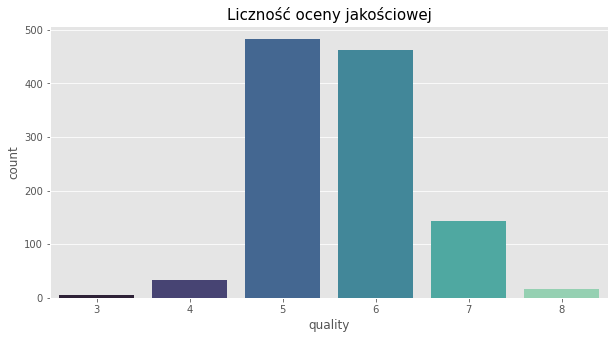

In [ ]:
X= data.columns[:-1]; y= data.columns[-1]
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=y, data=data, palette = 'mako', ax=ax)
ax.set_title('Liczność oceny jakościowej', fontsize=15, color = 'black');

Widzimy, że większość ocen skupia się wokół średnich wartości - przypadki skrajnie kiepskich i wyśmienitych rodzajów nawet nie występują w próbce.
Spróbujmy wyrównać wielkości próbek przy użyciu [SMOTE - Synthetic Minority Over-sampling Technique](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)



In [ ]:
from imblearn.over_sampling import SMOTE
X=data.drop(['quality'],axis=1)
y=data['quality']
strategy={3:340,4:350,7:350,8:350}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

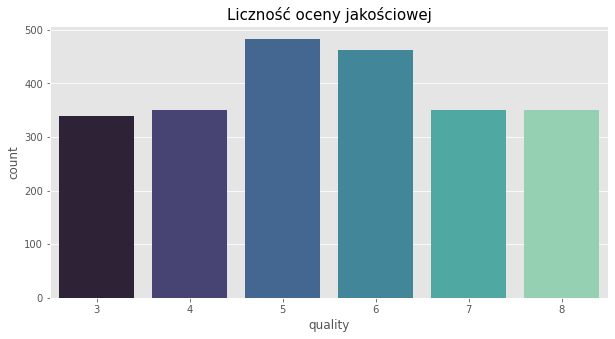

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=y, data=data, palette = 'mako', ax=ax)
ax.set_title('Liczność oceny jakościowej', fontsize=15, color = 'black');

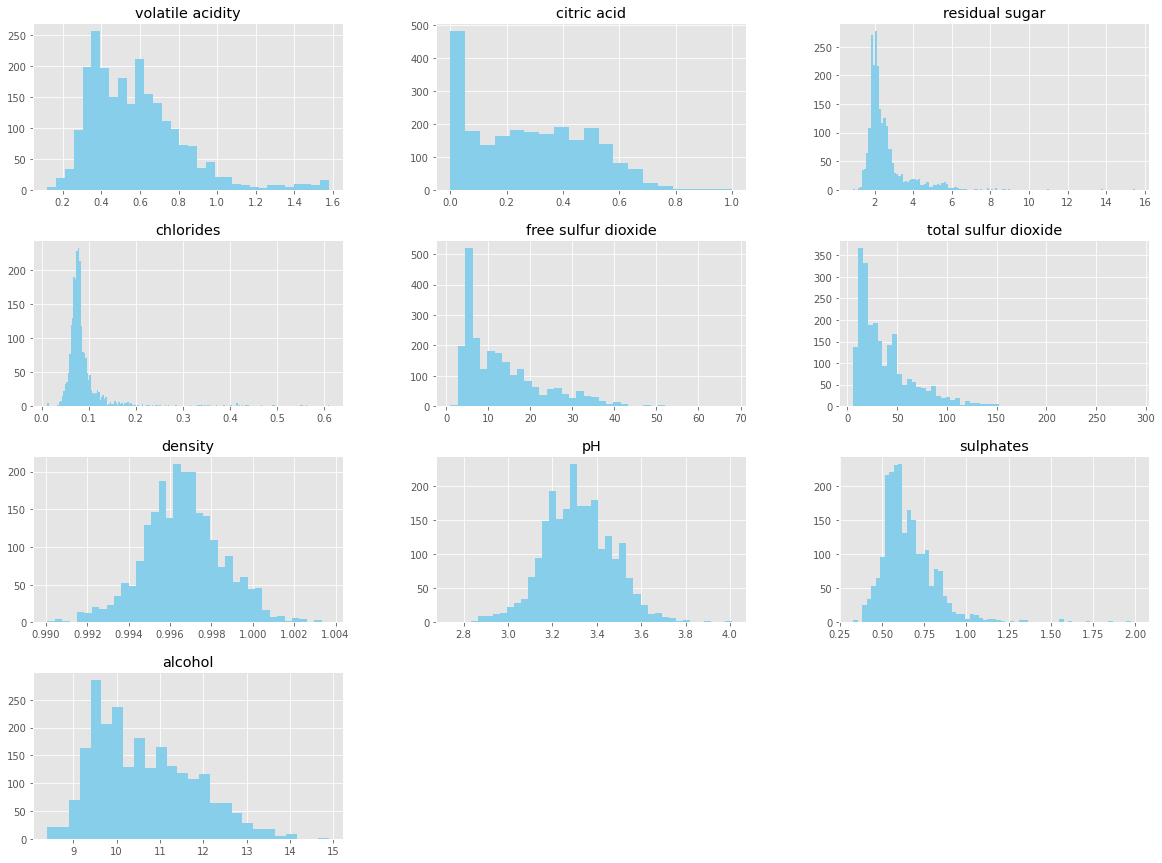

In [ ]:
plt.rcParams['text.color'] = 'black'
X.hist(figsize=(20,15),bins='auto', color='skyblue')
plt.show()

In [ ]:
corr = data.loc[:, data.columns != "classification"].corr()
corr

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710
alcohol,-0.203909,0.106250,0.058421,-0.229917,-0.047095,-0.188165,-0.494727,0.225322,0.094421,1.000000,0.484866


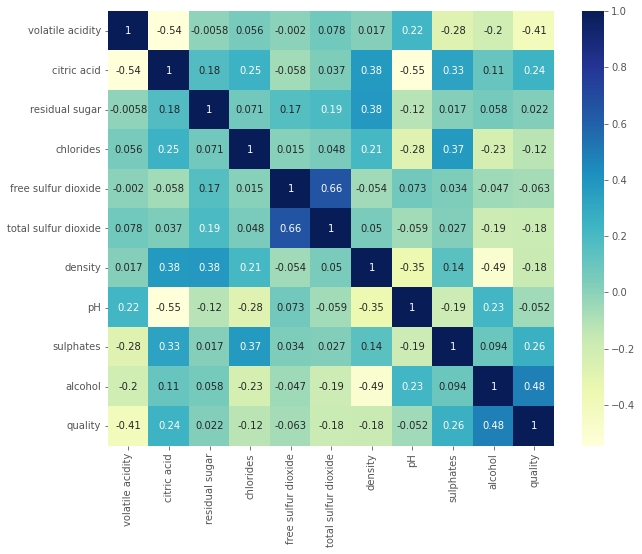

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

Możemy zaobserwować dosyć oczywiste korelacje jak np. kwas cytrynowy i wartość pH (odwrotna korelacja) czy gęstość i zawartość cukru. Jednak ciekawszym dla nas elementem jest kolumna 'quality', w której największa wartość pojawia się w zestawieniu z 'alcohol', analogicznie najmniejsza - w zestawieniu z 'volatile acidity'.

# Modelowanie danych
Znormalizujmy dane i podzielmy na train i test.

In [ ]:
X.describe().T[['min', 'max']][:-1].style.background_gradient(cmap='YlGnBu')

,min,max
volatile acidity,0.120000,1.580000
citric acid,0.000000,1.000000
residual sugar,0.900000,15.500000
chlorides,0.012000,0.611000
free sulfur dioxide,1.000000,68.000000
total sulfur dioxide,6.000000,289.000000
density,0.990070,1.003690
pH,2.740000,4.010000
sulphates,0.330000,2.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled.head(10)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.491461,-1.374949,-0.572601,-0.234971,-0.256361,-0.143882,0.611316,1.234945,-0.579530,-1.060680
1,1.224193,-1.374949,0.021305,0.215321,1.208037,0.989121,0.087674,-0.745164,0.117046,-0.709650
2,0.735705,-1.179824,-0.233226,0.092514,0.162038,0.542787,0.192403,-0.361917,-0.057098,-0.709650
3,-1.218246,1.356806,-0.572601,-0.255438,0.371238,0.748787,0.716044,-1.000662,-0.463434,-0.709650
4,0.491461,-1.374949,-0.572601,-0.234971,-0.256361,-0.143882,0.611316,1.234945,-0.579530,-1.060680
5,0.328632,-1.374949,-0.657445,-0.255438,-0.047162,0.062119,0.611316,1.234945,-0.579530,-1.060680
6,0.084388,-1.082261,-0.827132,-0.378245,0.162038,0.714454,-0.121782,-0.106419,-1.160011,-1.060680
7,0.287925,-1.374949,-1.166507,-0.460116,0.162038,-0.590216,-1.064337,0.468451,-1.101963,-0.534135
8,0.002974,-1.277387,-0.487757,-0.296374,-0.465561,-0.693217,0.087674,0.276827,-0.521482,-0.972922
9,0.002974,-0.984699,-0.657445,0.194853,0.162038,0.920454,-0.383603,-0.234168,-0.695626,-1.236195


In [ ]:
X = X_scaled
X.shape, y.shape

((2335, 10), (2335,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1401, 10) (1401,)
(934, 10) (934,)


# Modele proste


*   rbf SVM
*   Linear SVM
*   LogisticRegression
*   DecisionTreeClassifier
*   RandomForestClassifier
*   BaggingClassifier
*   ExtraTreesClassifier.
*   AdaBoostClassifier
*   GradientBoostingClassifier















In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=seed)

In [ ]:
from sklearn import  metrics
models = []

Model SVM z jądrem rbf:

In [ ]:
pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf', probability = True))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.01, 0.1, 1, 10, 100, 1000],
            'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}

grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 10,
 'classifier__gamma': 1,
 'preprocessing': StandardScaler()}

Model SVM z jądrem linear.

In [ ]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_2 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__tol': [1e-4, 1e-3, 1e-2, 1e-1]
}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 100,
 'classifier__tol': 0.01,
 'preprocessing': StandardScaler()}



Regresja logistyczna.


In [ ]:
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}

grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True) 
grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 100, 'preprocessing': None}

DecisionTreeClassifier.

In [ ]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 20],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': None,
 'preprocessing': StandardScaler()}

RandomForestClassifier.

In [ ]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 50],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 50,
 'preprocessing': None}

BaggingClassifier.

In [ ]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_samples' : [0.05, 0.1, 0.2, 0.5, 0.7, 1]
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_samples': 0.7, 'preprocessing': StandardScaler()}

ExtraTreesClassifier.

In [ ]:
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

AdaBoostClassifier.

In [ ]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 5,
 'preprocessing': StandardScaler()}

GradientBoostingClassifier.

In [ ]:
pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_9 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

# Porównanie modeli

In [ ]:
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('Logistic regression', grid_3.best_estimator_))
models.append(('DecisionTreeClassifier', grid_4.best_estimator_))
models.append(('RandomForestClassifier', grid_5.best_estimator_))
models.append(('BaggingClassifier', grid_6.best_estimator_))
models.append(('ExtraTreesClassifier', grid_7.best_estimator_))
models.append(('AdaBoostClassifier', grid_8.best_estimator_))
models.append(('GradientBoostingClassifier', grid_9.best_estimator_))

def get_scores(name, model):
    precision_score = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    recall_score = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    f1_score = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

    return dict(method=name, precision=precision_score, recall=recall_score, f1=f1_score, accuracy=accuracy_score)

def print_scores(scores):
    print(scores['method'])
    print("R^2: {}".format(scores['precision']))
    print("recall_score: {}".format(scores['recall']))
    print("f1_score: {}".format(scores['f1']))
    print("accuracy_score: {}".format(scores['accuracy']))

In [ ]:
scores_1 = get_scores(*models[-1])
scores_2 = get_scores(*models[-2])
scores_3 = get_scores(*models[-3])
scores_4 = get_scores(*models[-4])
scores_5 = get_scores(*models[-5])
scores_6 = get_scores(*models[-6])
scores_7 = get_scores(*models[-7])
scores_8 = get_scores(*models[-8])
scores_9 = get_scores(*models[-9])

summary = pd.DataFrame(data=scores_1, index=[0])
summary.loc[1] = scores_2
summary.loc[2] = scores_3
summary.loc[3] = scores_4
summary.loc[4] = scores_5
summary.loc[5] = scores_6
summary.loc[6] = scores_7
summary.loc[7] = scores_8
summary.loc[8] = scores_9
summary

,method,precision,recall,f1,accuracy
0,GradientBoostingClassifier,0.790150,0.790150,0.790150,0.790150
1,AdaBoostClassifier,0.404711,0.404711,0.404711,0.404711
2,ExtraTreesClassifier,0.759101,0.759101,0.759101,0.759101
3,BaggingClassifier,0.759101,0.759101,0.759101,0.759101
4,RandomForestClassifier,0.767666,0.767666,0.767666,0.767666
5,DecisionTreeClassifier,0.702355,0.702355,0.702355,0.702355
6,Logistic regression,0.611349,0.611349,0.611349,0.611349
7,SVM linear,0.632762,0.632762,0.632762,0.632762
8,SVM rbf,0.825482,0.825482,0.825482,0.825482


Text(0.5, 0, 'Accuracies')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



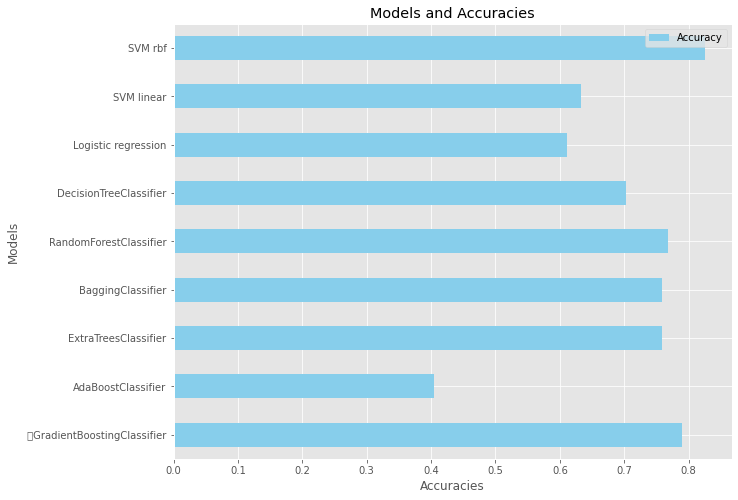

In [52]:
accuracies = { 
    'Models' : [' 	GradientBoostingClassifier', 'AdaBoostClassifier', 'ExtraTreesClassifier', 'BaggingClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'Logistic regression', 'SVM linear', 'SVM rbf'],
    'Accuracy' : [0.790150,0.404711, 0.759101, 0.759101, 0.767666,  0.702355, 0.611349, 0.632762, 0.825482]
}

accuracy_df = pd.DataFrame(data = accuracies)
accuracy_df.set_index("Models", inplace = True)

accuracy_df.plot.barh(figsize = (10,8), color = 'skyblue')
plt.title("Models and Accuracies")
plt.xlabel("Accuracies")

Widzimy, że największą wartość accuracy otrzymał model SVM z jądrem rbf, przy czym podobny wynik ma też Gradient Boosting Classifier.
Najgorzej przedstawia się Ada Boost Classifier.

Poniżej Confusion Matrix dla SVM rbf:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Confusion Matrix')

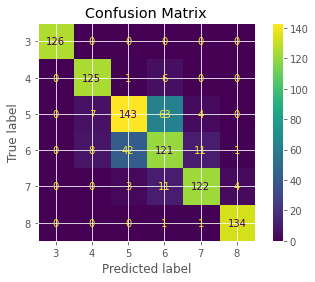

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_1, X_test, y_test)
plt.title('Confusion Matrix')